# ------------------------- Email spam detection -------------------------



                               Made By :- Mahesh Santosh Lakade

                               Guided By :- Mr.Deepak Gurav Sir


### Context:

We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

This is a Machine Learning algorith to Detect the possible Spam Mail judging by it's content.

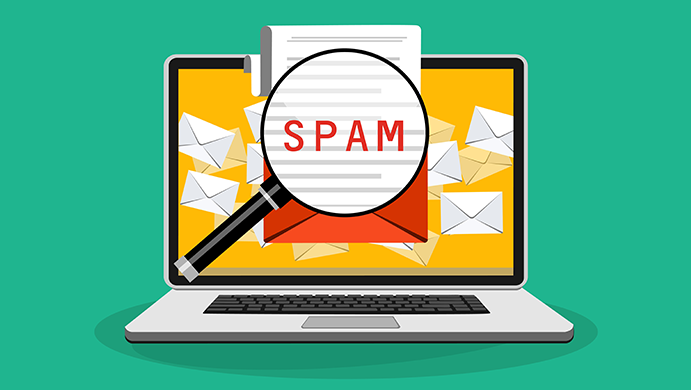

# IMPORTING MODULES

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [42]:
data = pd.read_csv('Spam_Email_Detection_spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# DATA EXPLORATION

In [43]:
data.drop(columns=data[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
data.shape

(5572, 2)

In [46]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [47]:
data.loc[data['v1'] == 'spam', 'v1',] = 0
data.loc[data['v1'] == 'ham', 'v1',] = 1
data

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will �_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [48]:
X = data['v2']
Y = data['v1']
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


# TRAINING AND TESTING DATA SPLITTING

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [50]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [51]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


# FEATURE EXTRACTION

In [52]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)

In [53]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [54]:
Y_train = Y_train.astype('int64')
Y_test = Y_test.astype('int64')

In [55]:
print(X_train)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... �� v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: v2, Length: 4457, dtype: object


In [56]:
print(X_train_features)

  (0, 2393)	0.42251087562056844
  (0, 6627)	0.310713090556495
  (0, 891)	0.4431414936624499
  (0, 3094)	0.4078732191722945
  (0, 3298)	0.4607061502580205
  (0, 3683)	0.38724260113041314
  (1, 4272)	0.3619488551509563
  (1, 3695)	0.49218179847458676
  (1, 7004)	0.3597932878999011
  (1, 3014)	0.2656832920063487
  (1, 6463)	0.46190436338926344
  (1, 2523)	0.46190436338926344
  (2, 3101)	0.15859116597265116
  (2, 4033)	0.15859116597265116
  (2, 778)	0.24853230530973786
  (2, 3257)	0.3059351024463395
  (2, 6888)	0.3323889186374277
  (2, 3854)	0.22778533625897432
  (2, 7123)	0.3323889186374277
  (2, 4821)	0.2640067957824946
  (2, 6098)	0.3323889186374277
  (2, 5482)	0.39905624733507106
  (2, 4331)	0.29741887579744203
  (2, 6969)	0.3059351024463395
  (3, 2634)	0.5203296680830578
  :	:
  (4454, 2237)	0.3411378469646735
  (4454, 3675)	0.27831729782661513
  (4454, 5622)	0.2706850118312608
  (4454, 1471)	0.320563528472775
  (4454, 2091)	0.2559560043743698
  (4454, 7003)	0.21660248574368937
  (445

# USING LOGISTIC REGRESSION

In [57]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [58]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data :', accuracy_on_training_data)

Accuracy on training data : 0.969710567646399


In [59]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data :', accuracy_on_test_data)

Accuracy on test data : 0.9560538116591928


# PREDICTION

In [60]:
input_your_mail = ["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)

[0]


In [61]:
if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Spam mail


# Plotting the Output by Matplotlib


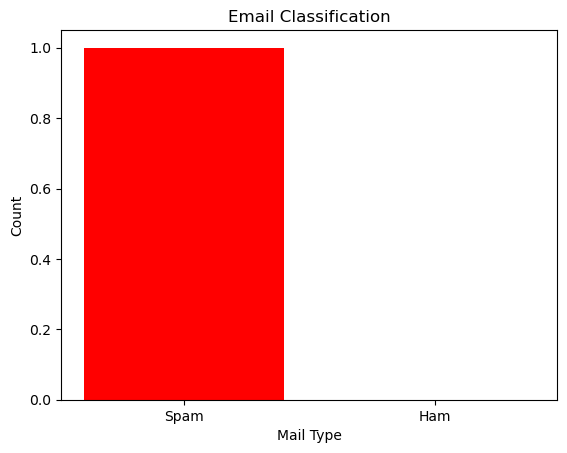

In [62]:
# Create a bar plot
labels = ['Spam', 'Ham']
counts = [len(prediction) - prediction.sum(), prediction.sum()]

plt.bar(labels, counts, color='red')
plt.xlabel('Mail Type')
plt.ylabel('Count')
plt.title('Email Classification')
plt.show()

# Random Forest Classification Model

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train_features, Y_train)

RandomForestClassifier()

In [65]:
classifier.score(X_test_features, Y_test)

0.9757847533632287

In [66]:
input_your_mail = ["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = classifier.predict(input_data_features)
print(prediction)

[0]


In [67]:
if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Spam mail


# Plotting the Output by Matplotlib


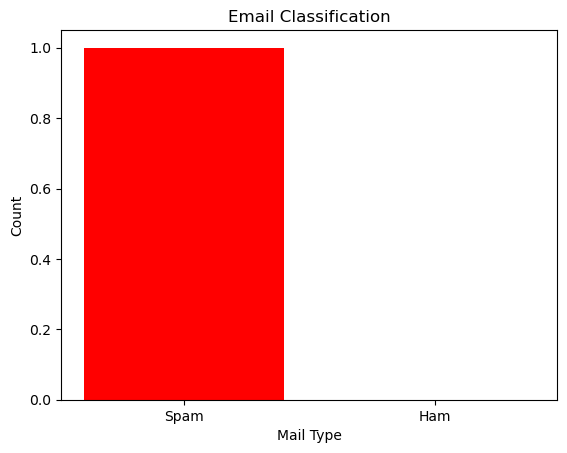

In [68]:
# Create a bar plot
labels = ['Spam', 'Ham']
counts = [len(prediction) - prediction.sum(), prediction.sum()]

plt.bar(labels, counts, color='red')
plt.xlabel('Mail Type')
plt.ylabel('Count')
plt.title('Email Classification')
plt.show()

# support vector machine classification

In [69]:
from sklearn.svm import SVC

In [70]:
classification_rbf = SVC(kernel='rbf')
classification_rbf.fit(X_train_features,Y_train)

SVC()

In [71]:
classification_rbf.score(X_test_features,Y_test)

0.9730941704035875

In [72]:
input_your_mail = [" hello mahesh"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = classification_rbf.predict(input_data_features)
print(prediction)

[1]


In [73]:
if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


# Plotting the Output by Matplotlib

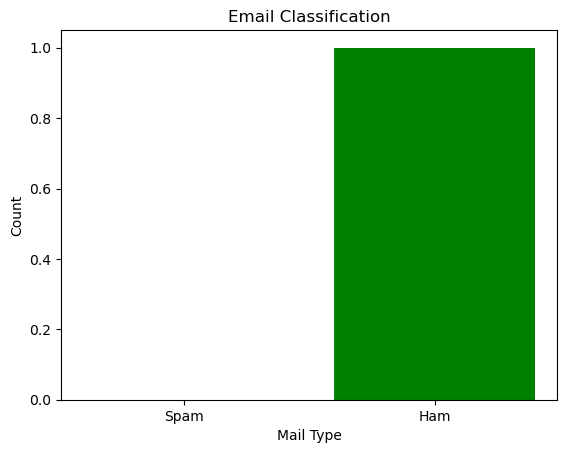

In [74]:
# Create a bar plot
labels = ['Spam', 'Ham']
counts = [len(prediction) - prediction.sum(), prediction.sum()]

plt.bar(labels, counts, color='green')
plt.xlabel('Mail Type')
plt.ylabel('Count')
plt.title('Email Classification')
plt.show()

In [75]:
y_pred = model.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(Y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       166
           1       0.95      1.00      0.97       949

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

Confusion Matrix:
[[118  48]
 [  1 948]]


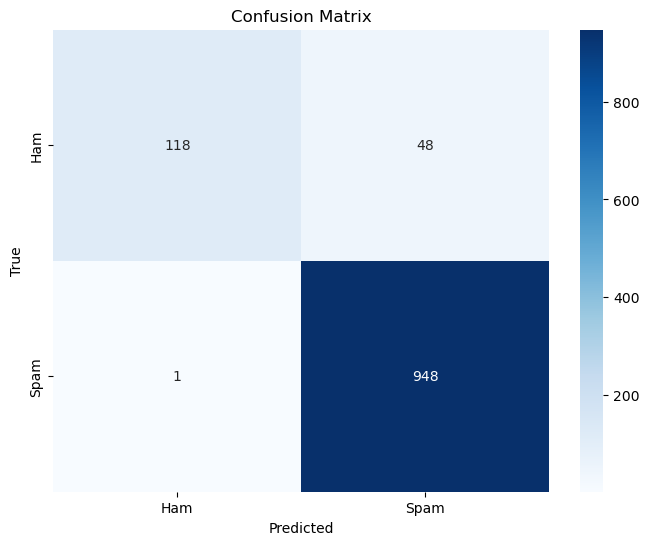

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
